<a href="https://colab.research.google.com/github/Shahnaz0611/Python/blob/main/healthdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("healthcare_dataset.csv")
df.head()


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Days
0,Bobby JacksOn,30,Male,B-,Cancer,1/31/2024,Matthew Smith,Sons and Miller,Blue Cross,"$18,856.28",328,Urgent,2/2/2024,Paracetamol,Normal,2
1,LesLie TErRy,62,Male,A+,Obesity,8/20/2019,Samantha Davies,Kim Inc,Medicare,"$33,643.33",265,Emergency,8/26/2019,Ibuprofen,Inconclusive,6
2,DaNnY sMitH,76,Female,A-,Obesity,9/22/2022,Tiffany Mitchell,Cook PLC,Aetna,"$27,955.10",205,Emergency,10/7/2022,Aspirin,Normal,15
3,andrEw waTtS,28,Female,O+,Diabetes,11/18/2020,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,"$37,909.78",450,Elective,12/18/2020,Ibuprofen,Abnormal,30
4,adrIENNE bEll,43,Female,AB+,Cancer,9/19/2022,Kathleen Hanna,White-White,Aetna,"$14,238.32",458,Urgent,10/9/2022,Penicillin,Abnormal,20


In [3]:
df.info() # provides a concise summary of a DataFrame's structure.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54966 entries, 0 to 54965
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                54966 non-null  object
 1   Age                 54966 non-null  int64 
 2   Gender              54966 non-null  object
 3   Blood Type          54966 non-null  object
 4   Medical Condition   54966 non-null  object
 5   Date of Admission   54966 non-null  object
 6   Doctor              54966 non-null  object
 7   Hospital            54966 non-null  object
 8   Insurance Provider  54966 non-null  object
 9   Billing Amount      54966 non-null  object
 10  Room Number         54966 non-null  int64 
 11  Admission Type      54966 non-null  object
 12  Discharge Date      54966 non-null  object
 13  Medication          54966 non-null  object
 14  Test Results        54966 non-null  object
 15  Days                54966 non-null  int64 
dtypes: int64(3), object(13

In [4]:
df.describe() # provides summary statistics for numerical columns in a DataFrame.

,Age,Room Number,Days
count,54966.000000,54966.000000,54966.000000
mean,51.535185,301.124404,15.499290
std,19.605661,115.223143,8.661471
min,13.000000,101.000000,1.000000
25%,35.000000,202.000000,8.000000
50%,52.000000,302.000000,15.000000
75%,68.000000,401.000000,23.000000
max,89.000000,500.000000,30.000000


In [5]:
df.isnull().sum() # counts the number of missing values in each column of a DataFrame.

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


In [14]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission']) # converts the 'Date of Admission' column to a datetime format.
df['Discharge Date'] = pd.to_datetime(df['Discharge Date']) # converts the 'Discharge Date' column to a datetime format.

In [15]:
df.describe(include= "object").T # provides summary statistics for categorical columns in a DataFrame.

,count,unique,top,freq
Name,54966,49992,DAvId muNoZ,3
Gender,54966,2,Male,27496
Blood Type,54966,8,A-,6898
Medical Condition,54966,6,Arthritis,9218
Doctor,54966,40341,Michael Smith,27
Hospital,54966,39876,LLC Smith,44
Insurance Provider,54966,5,Cigna,11139
Billing Amount,54966,49760,"$16,208.95",5
Admission Type,54966,3,Elective,18473
Medication,54966,5,Lipitor,11038


In [16]:
df['Gender'].value_counts() # counts the occurrences of each unique value in the 'Gender' column.

,count
Gender,
Male,27496
Female,27470


In [17]:
print(df['Blood Type'].value_counts()) # counts the occurrences of each unique value in the 'Blood Type' column.

Blood Type
A-     6898
A+     6896
B+     6885
AB+    6882
AB-    6874
B-     6872
O+     6855
O-     6804
Name: count, dtype: int64


In [18]:
print(df['Admission Type'].value_counts()) # counts the occurrences of each unique value in the 'Admission Type' column.

Admission Type
Elective     18473
Urgent       18391
Emergency    18102
Name: count, dtype: int64


In [19]:
print(df['Insurance Provider'].value_counts()) # counts the occurrences of each unique value in the 'Insurance Provider' column.

Insurance Provider
Cigna               11139
Medicare            11039
UnitedHealthcare    11014
Blue Cross          10952
Aetna               10822
Name: count, dtype: int64


In [20]:
print(df['Doctor'].value_counts().sum()) # counts the occurrences of each unique value in the 'Doctor' column.

54966


In [21]:
# Test results analysis
print(df['Test Results'].value_counts()) # counts the occurrences of each unique value in the 'Test Results' column.

Test Results
Abnormal        18437
Normal          18331
Inconclusive    18198
Name: count, dtype: int64


In [22]:
df.columns # provides a list of column names in a DataFrame.


Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'Days', 'days'],
      dtype='object')

In [23]:
df.drop_duplicates(inplace=True)  # removes duplicate rows from a DataFrame.

In [25]:
df.drop('days', axis=1, inplace=True) # removes the 'days' column from a DataFrame.

In [26]:
df.head() # displays the first few rows of a DataFrame.


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Days
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,"$18,856.28",328,Urgent,2024-02-02,Paracetamol,Normal,2
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,"$33,643.33",265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,"$27,955.10",205,Emergency,2022-10-07,Aspirin,Normal,15
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,"$37,909.78",450,Elective,2020-12-18,Ibuprofen,Abnormal,30
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,"$14,238.32",458,Urgent,2022-10-09,Penicillin,Abnormal,20


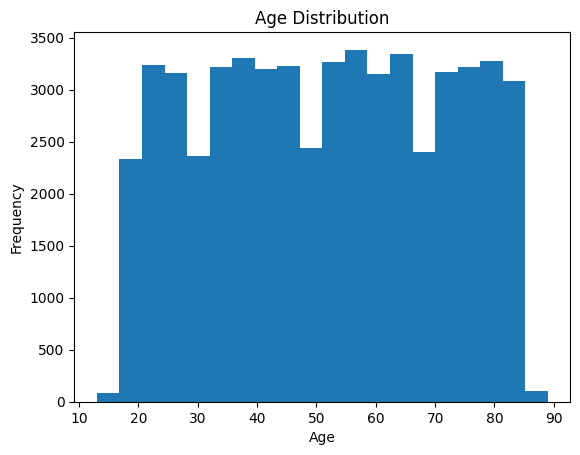

In [31]:
# Create a histogram for the 'Age' column
plt.hist(df['Age'], bins=20) # Plot a histogram of the 'Age' column with 20 bins
plt.xlabel('Age') # Set the x-axis label
plt.ylabel('Frequency') # Set the y-axis label
plt.title('Age Distribution') # Set the plot title
plt.show() # Display the plot

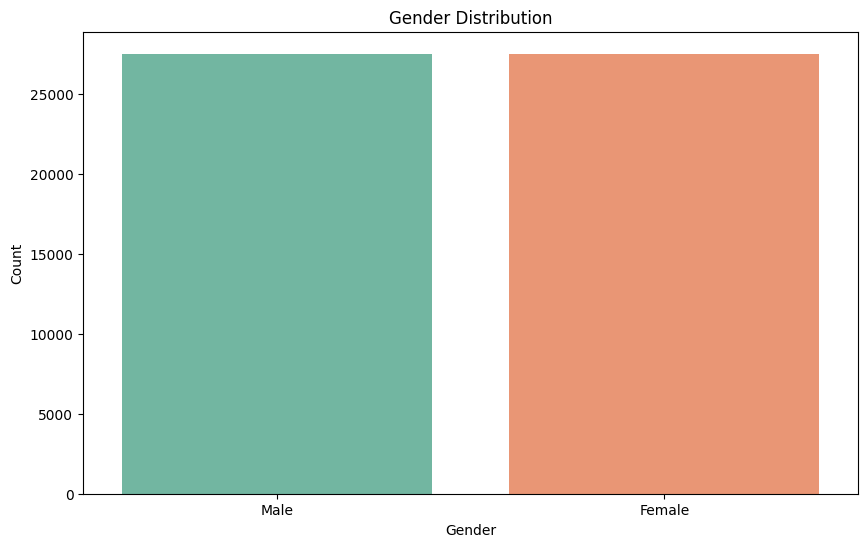

In [36]:
# Create a countplot using seaborn
plt.figure(figsize=(10, 6)) # Creates a figure with a width of 10 and height of 6 inches
sns.countplot(x='Gender', data=df, palette="Set2", saturation=0.75) # Creates a countplot with the 'Gender' column from the DataFrame
plt.xlabel('Gender')  # Set the x-axis label
plt.ylabel('Count')  # Set the y-axis label
plt.title('Gender Distribution')  # Set the plot title
plt.show()  # Display the plot

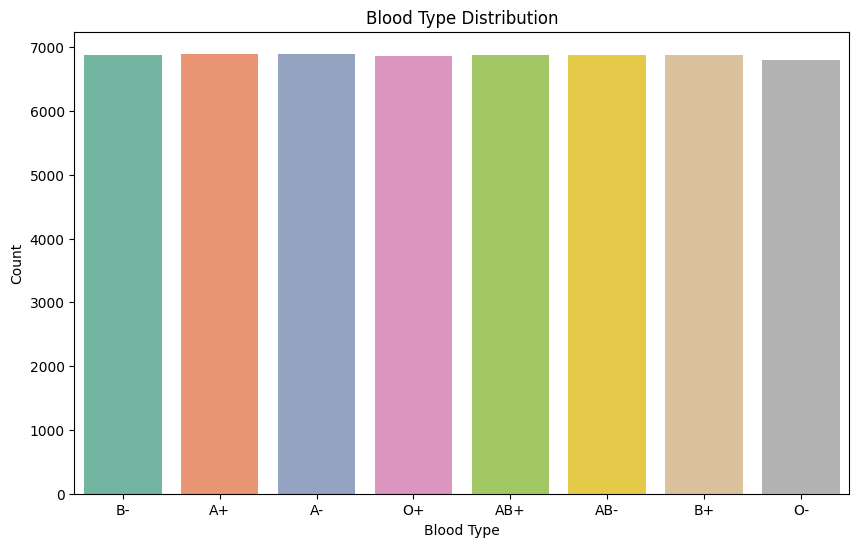

In [37]:
# Create a countplot using seaborn
plt.figure(figsize=(10, 6)) # Creates a figure with a width of 10 and height of 6 inches
sns.countplot(x='Blood Type', data=df, palette="Set2", saturation=0.75) # Creates a countplot with the 'Blood Type' column from the DataFrame
plt.xlabel('Blood Type')  # Set the x-axis label
plt.ylabel('Count')  # Set the y-axis label
plt.title('Blood Type Distribution')  # Set the plot title
plt.show()  # Display the plot

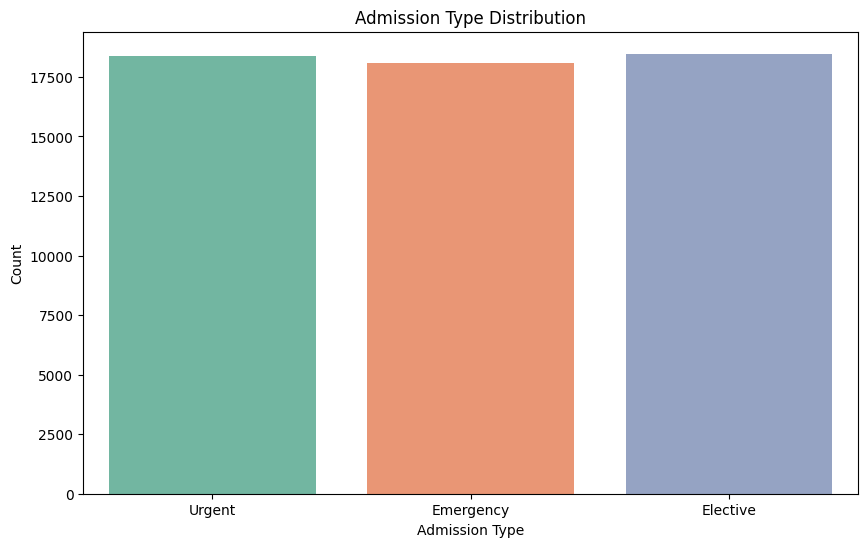

In [38]:
#Creates a countplot with the 'Admission Type' column from the DataFrame
plt.figure(figsize=(10, 6)) #Creates a figure with a width of 10 and height of 6 inches
sns.countplot(x='Admission Type', data=df, palette="Set2", saturation=0.75) # Creates a countplot with the 'Admission Type' column from the DataFrame
plt.xlabel('Admission Type')  # Set the x-axis label
plt.ylabel('Count') # Set the y-axis label
plt.title('Admission Type Distribution')  # Set the plot title
plt.show()  # Display the plot

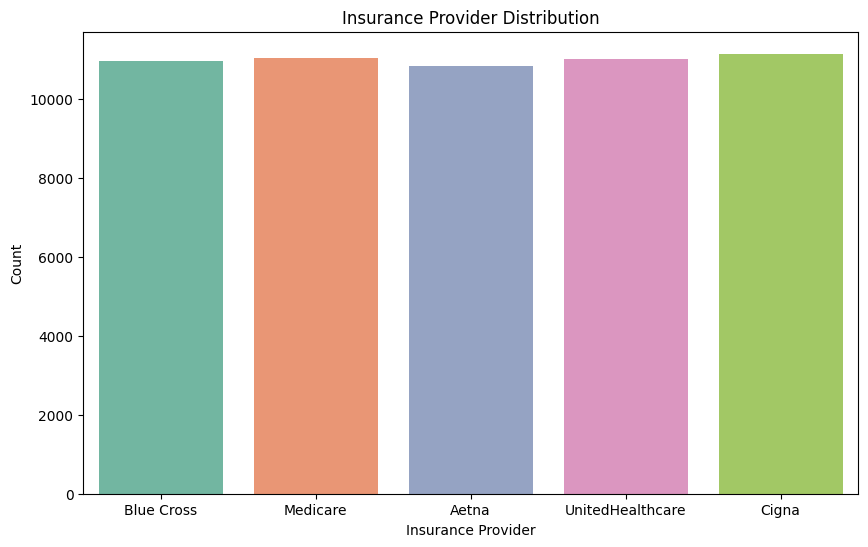

In [39]:
# Creates a countplot with the 'Insurance Provider' column from the DataFrame
plt.figure(figsize=(10, 6)) #Creates a figure with a width of 10 and height of 6 inches
sns.countplot(x='Insurance Provider', data=df, palette="Set2", saturation=0.75) # Creates a countplot with the 'Insurance Provider' column from the DataFrame
plt.xlabel('Insurance Provider')  # Set the x-axis label
plt.ylabel('Count')  # Set the y-axis label
plt.title('Insurance Provider Distribution')  # Set the plot title
plt.show()  # Display the plot

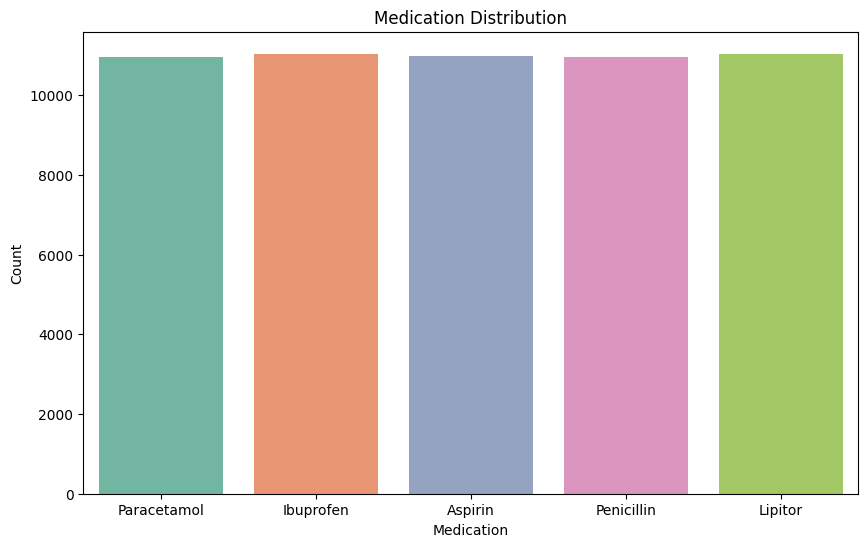

In [41]:
# Creates a countplot with the 'Medication' column from the DataFrame
plt.figure(figsize=(10, 6)) #Creates a figure with a width of 10 and height of 6 inches
sns.countplot(x='Medication', data=df, palette="Set2", saturation=0.75) # Creates a countplot with the 'Medication' column from the DataFrame
plt.xlabel('Medication')  # Set the x-axis label
plt.ylabel('Count')  # Set the y-axis label
plt.title('Medication Distribution')  # Set the plot title
plt.show()  # Display the plot

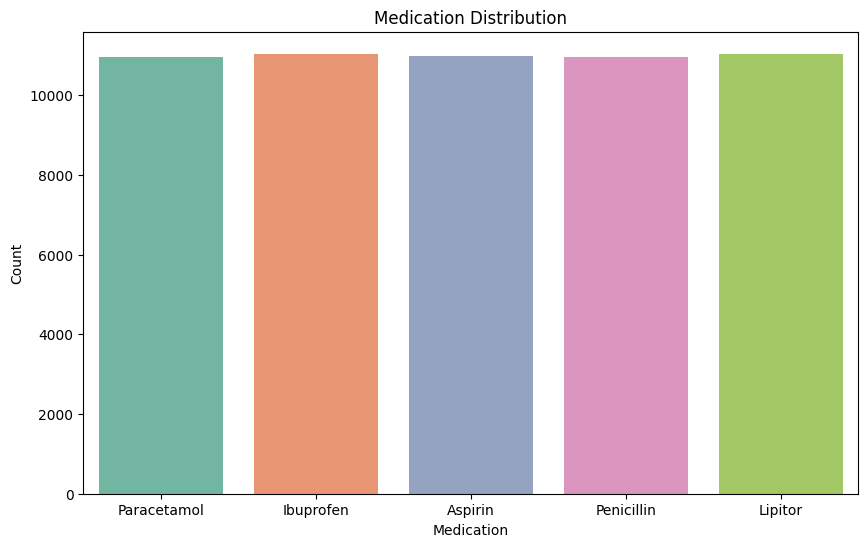

In [42]:
# Creates a countplot with the 'Medication' column from the DataFrame
plt.figure(figsize=(10, 6)) #Creates a figure with a width of 10 and height of 6 inches
sns.countplot(x='Medication', data=df, palette="Set2", saturation=0.75) # Creates a countplot with the 'Medication' column from the DataFrame
plt.xlabel('Medication')  # Set the x-axis label
plt.ylabel('Count')  # Set the y-axis label
plt.title('Medication Distribution')  # Set the plot title
plt.show()

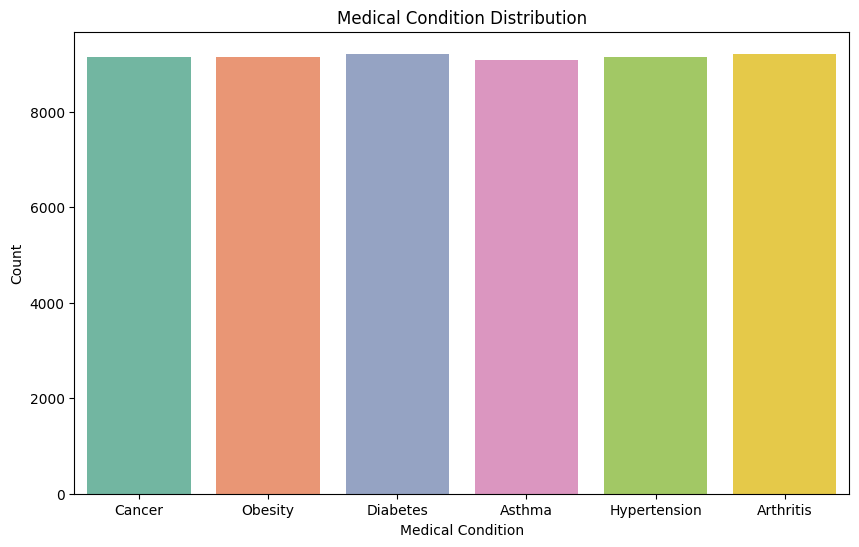

In [43]:
# Creates a countplot with the 'Medical Condition' column from the DataFrame
plt.figure(figsize=(10, 6)) #Creates a figure with a width of 10 and height of 6 inches
sns.countplot(x='Medical Condition', data=df, palette="Set2", saturation=0.75)  # Creates a countplot with the 'Medical Condition' column from the DataFrame
plt.xlabel('Medical Condition')  # Set the x-axis label
plt.ylabel('Count')  # Set the y-axis label
plt.title('Medical Condition Distribution')  # Set the plot title
plt.show()  # Display the plot

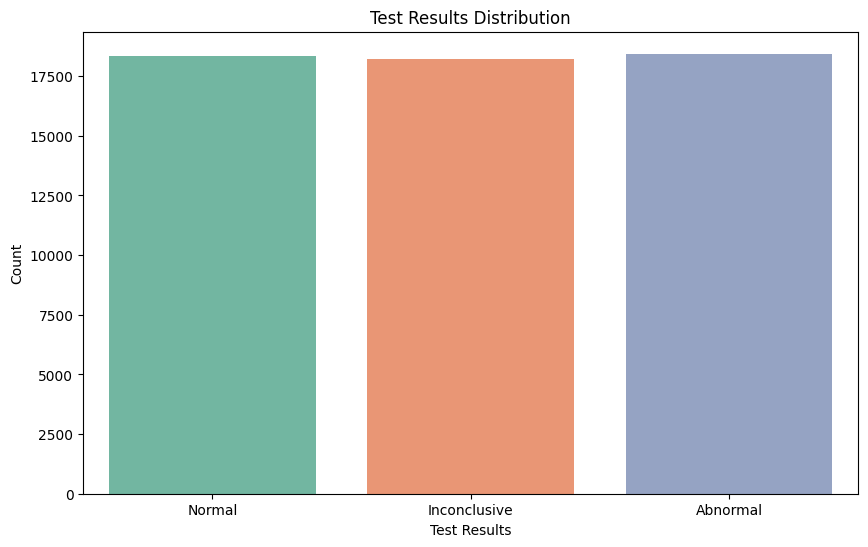

In [44]:
# Creates a countplot with the 'Test Results' column from the DataFrame
plt.figure(figsize=(10, 6)) #Creates a figure with a width of 10 and height of 6 inches
sns.countplot(x='Test Results', data=df, palette="Set2", saturation=0.75) # Creates a countplot with the 'Test Results' column from the DataFrame
plt.xlabel('Test Results')  # Set the x-axis label
plt.ylabel('Count')  # Set the y-axis label
plt.title('Test Results Distribution')  # Set the plot title
plt.show()

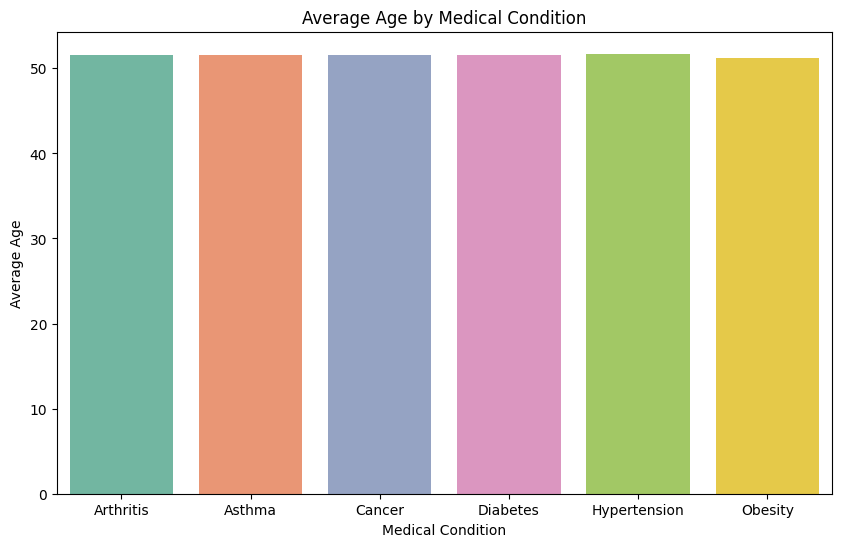

In [45]:
# Creates a barplot with the 'Medical Condition' column from the DataFrame
age_by_condition = df.groupby('Medical Condition')['Age'].mean().reset_index()  # Calculate the average age for each medical condition
plt.figure(figsize=(10, 6)) #Creates a figure with a width of 10 and height of 6 inches
sns.barplot(x='Medical Condition', y='Age', data=age_by_condition, palette="Set2")  # Creates a barplot with the 'Medical Condition' column from the DataFrame
plt.xlabel('Medical Condition')  # Set the x-axis label
plt.ylabel('Average Age')  # Set the y-axis label
plt.title('Average Age by Medical Condition')  # Set the plot title
plt.show()  # Display the plot

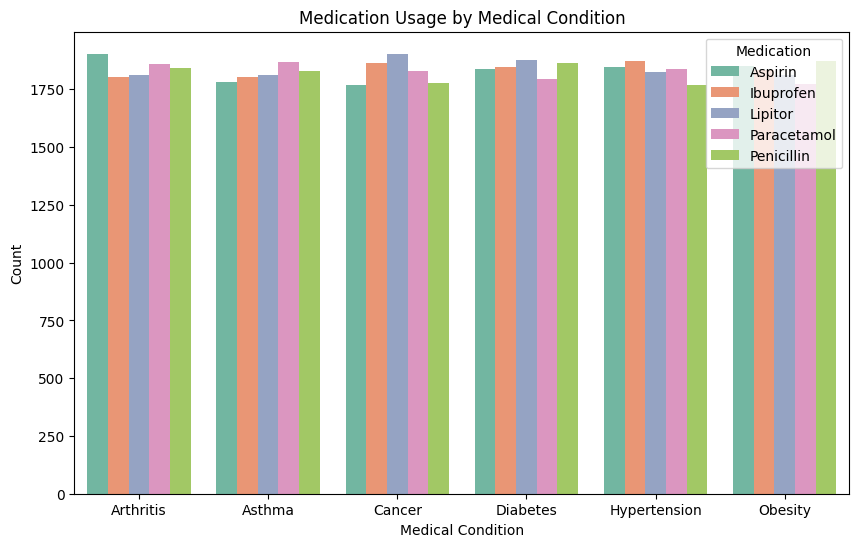

In [46]:
# Creates a barplot with the 'Medical Condition' column from the DataFrame
grouped_df = df.groupby(['Medical Condition', 'Medication']).size().reset_index(name='Count') # Calculate the count of each combination of 'Medical Condition' and 'Medication'
plt.figure(figsize=(10, 6)) #Creates a figure with a width of 10 and height of 6 inches
sns.barplot(x='Medical Condition', y='Count', hue='Medication', data=grouped_df, palette="Set2")  # Creates a barplot with the 'Medical Condition' column from the DataFrame
plt.xlabel('Medical Condition')  # Set the x-axis label
plt.ylabel('Count')  # Set the y-axis label
plt.title('Medication Usage by Medical Condition')  # Set the plot title
plt.legend(title='Medication')  # Set the legend title
plt.show()  # Display the plot

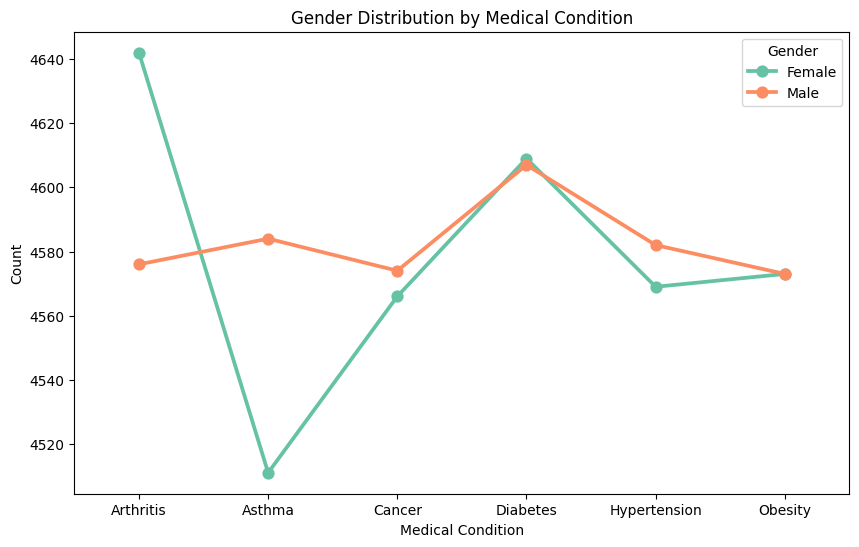

In [57]:
# Creates a pointplot with the 'Medical Condition' column from the DataFrame for both genders
sex_by_condition = df.groupby(['Medical Condition', 'Gender']).size().reset_index(name='Count') # Calculate the count of each combination of 'Medical Condition' and 'Gender'
plt.figure(figsize=(10, 6)) #Creates a figure with a width of 10 and height of 6 inches
sns.pointplot(x='Medical Condition', y='Count', hue='Gender', data=sex_by_condition, palette="Set2")  # Creates a pointplot with the 'Medical Condition' column from the DataFrame
#sns.boxenplot(x='Medical Condition', y='Count', hue='Gender', data=sex_by_condition, palette="Set2")
plt.xlabel('Medical Condition')  # Set the x-axis label
plt.ylabel('Count')  # Set the y-axis label
plt.title('Gender Distribution by Medical Condition')  # Set the plot title
plt.legend(title='Gender')  # Set the legend title
plt.show()

In [67]:
# Creates a barplot with the 'Medical Condition' and 'Blood Type' column from the DataFrame
grouped_df = df.groupby(['Blood Type', 'Medical Condition']).size().reset_index(name='Count') # Calculate the count of each combination of 'Blood Type' and 'Medical Condition'

# Plot using Plotly Express
fig = px.bar(grouped_df, x='Blood Type', y='Count', color='Medical Condition', barmode='group',
             title='Patient Count by Blood Type and Medical Condition',
             labels={'Count': 'Patient Count', 'Blood Type': 'Blood Type', 'Medical Condition': 'Medical Condition'})  # Creates a barplot with the 'Blood Type' column from the DataFrame
fig.show()  # Display the plot


In [73]:
# Creates a barplot with the 'Medical Condition' column from the DataFrame
emergency_df = df.query("`Admission Type` == 'Emergency'").groupby(['Gender', 'Medical Condition']).size().reset_index(name='Count')  # Calculate the count of each combination of 'Gender' and 'Medical Condition' for 'Emergency' admission type

# Plot using Plotly Express
fig = px.bar(emergency_df, x='Gender', y='Count', color='Medical Condition', barmode='group',
             title='Emergency Admission Count by Gender and Medical Condition ',
             labels={'Count': 'Patient Count', 'Gender': 'Gender', 'Medical Condition': 'Medical Condition'})  # Creates a barplot with the 'Gender' column from the DataFrame
fig.show()  # Display the plot

In [77]:
# Creates a barplot with the 'Blood Type' column from the DataFrame
emergency1_df = df.query("`Admission Type` == 'Emergency'").groupby(['Gender', 'Blood Type']).size().reset_index(name='Count')  # Calculate the count of each combination of 'Gender' and 'Blood Type' for 'Emergency' admission type

# Plot using Plotly Express
fig = px.bar(emergency1_df, x='Blood Type', y='Count', color='Gender', barmode='group',
             title='Emergency Admission Count by Blood Type for both Genders',
             labels={'Count': 'Patient Count', 'Blood Type': 'Blood Type', 'Gender': 'Gender'})  # Creates a barplot with the 'Blood Type' column from the DataFrame
fig.show()  # Display the plot

In [78]:
# Creates a barplot with the 'Admission Type' column from the DataFrame
grouped_df = df.groupby(['Admission Type', 'Medical Condition']).size().reset_index(name='Count')  # Calculate the count of each combination of 'Admission Type' and 'Medical Condition'

# Plot using Plotly Express
fig = px.bar(grouped_df, x='Admission Type', y='Count', color='Medical Condition', barmode='group',
             title='Patient Count by Admission Type and Medical Condition',
             labels={'Count': 'Patient Count', 'Admission Type': 'Admission Type', 'Medical Condition': 'Medical Condition'})  # Creates a barplot with the 'Admission Type' column from the DataFrame
fig.show()  # Display the plot

In [81]:
# Creates a barplot with the 'Test Results' column from the DataFrame
emergency2_df = df.query("`Admission Type` == 'Emergency'").groupby(['Test Results', 'Medical Condition']).size().reset_index(name='Count')  # Calculate the count of each combination of 'Test Results' and 'Medical Condition' for 'Emergency' admission type

# Plot using Plotly Express
fig = px.bar(emergency2_df, x='Test Results', y='Count', color='Medical Condition', barmode='group',
             title='Emergency Admission Count by Test Results and Medical Condition',
             labels={'Count': 'Patient Count', 'Test Results': 'Test Results', 'Medical Condition': 'Medical Condition'})  # Creates a barplot with the 'Test Results' column from the DataFrame
fig.show()  # Display the plot

In [83]:
 # Creates a barplot with the 'Medication' and 'Gender' column from the DataFrame
emergency3_df = df.query("`Admission Type` == 'Emergency'").groupby(['Medication', 'Gender']).size().reset_index(name='Count')  # Calculate the count of each combination of 'Medication' and 'Gender' for 'Emergency' admission type

# Plot using Plotly Express
fig = px.bar(emergency3_df, x='Medication', y='Count', color='Gender', barmode='group',
             title='Emergency Admission Count by Medication and Gender',
             labels={'Count': 'Patient Count', 'Medication': 'Medication', 'Gender': 'Gender'})  # Creates a barplot with the 'Medication' column from the DataFrame
fig.show()  # Display the plot

In [84]:
# Find the most common blood type in the DataFrame
most_common_blood_type = df['Blood Type'].value_counts().idxmax()
print(f"The most common blood type among the patients is {most_common_blood_type}.")

The most common blood type among the patients is A-.


In [85]:
# Count the number of unique hospitals in the dataset
unique_hospitals = df['Hospital'].nunique()
print(f"There are {unique_hospitals} unique hospitals included in the dataset.")

There are 39876 unique hospitals included in the dataset.


In [86]:
# Find the age and name of the oldest patient
oldest_patient_age = df['Age'].max()
oldest_patient_name = df[df['Age'] == oldest_patient_age]['Name'].iloc[0]
print(f"The oldest patient in the dataset is {oldest_patient_name} with an age of {oldest_patient_age} years.")

The oldest patient in the dataset is DAVId NeWTOn with an age of 89 years.


In [87]:
# Finds the doctor who has treated the highest number of patients.
doctor_highest_patient_count = df['Doctor'].value_counts().idxmax()
print(f"The doctor who has treated the highest number of patients is {doctor_highest_patient_count}.")

The doctor who has treated the highest number of patients is Michael Smith.


In [88]:
# Find the most frequently prescribed medication
most_frequent_medication = df['Medication'].value_counts().idxmax()
print(f"The most frequently prescribed medication is {most_frequent_medication}.")

The most frequently prescribed medication is Lipitor.


In [89]:
# Calculate monthly admissions
monthly_admissions = df['Date of Admission'].dt.month.value_counts().sort_index()

# Create a DataFrame
monthly_admissions_df = pd.DataFrame({'Month': monthly_admissions.index, 'Admissions': monthly_admissions.values})

# Plot the trend using Plotly Express
fig = px.line(monthly_admissions_df, x='Month', y='Admissions', title='Monthly Admissions Trend')
fig.update_xaxes(title='Month')
fig.update_yaxes(title='Number of Admissions')
fig.show()


In [96]:
df['Billing Amount'] = df['Billing Amount'].str.replace('$', '').str.replace(',', '').astype(float) # Convert the 'Billing Amount' column to numeric

# Now calculate the average billing amount
average_billing_amount = df['Billing Amount'].mean()
print(f"The average billing amount for patients is ${average_billing_amount:.2f}.")

The average billing amount for patients is $25544.31.


In [97]:
# Count the number of male patients
male_patients = df[df['Gender'] == 'Male'].shape[0]

# Count the number of female patients
female_patients = df[df['Gender'] == 'Female'].shape[0]

# Print the results
print(f"There are {male_patients} Male patients and {female_patients} Female patients.")

There are 27496 Male patients and 27470 Female patients.


In [98]:
# Find the top three most common medical conditions
top_three_medical_conditions = df['Medical Condition'].value_counts().head(3)

# Print the results with a header
print("Top Three Most Common Medical Conditions:")
print("----------------------------------------")
print(top_three_medical_conditions)

Top Three Most Common Medical Conditions:
----------------------------------------
Medical Condition
Arthritis       9218
Diabetes        9216
Hypertension    9151
Name: count, dtype: int64
